In [1]:
spark

In [1]:
query_data = spark.read.json('/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Query/Year=2019/Month=07/Day=05')
click_data = spark.read.json('/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Click/Year=2019/Month=07/Day=05')

In [2]:
import json
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from matplotlib import font_manager, rc
query_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Query/Year=2019/Month=07/Day=05'
click_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Click/Year=2019/Month=07/Day=05'

In [3]:
def preprocessing(data):
    data1 = data.filter(data.inflow_channel == "i")
    data2 = data1.filter(data.tabcode == "tot")
    data3 = data2.select("query").collect()
    #totalQuery = data3.count()
    return data3#, totalQuery

In [4]:
refined_query_data = preprocessing(query_data)

In [31]:
query_ranking = Counter(refined_query_data)
total = sum(query_ranking.values())
topTen = query_ranking.most_common(100)
topHund = query_ranking.most_common(1000)
topThousand = query_ranking.most_common(10000)
topTenThousand = query_ranking.most_common(100000)
topHundThousand = query_ranking.most_common(100000)

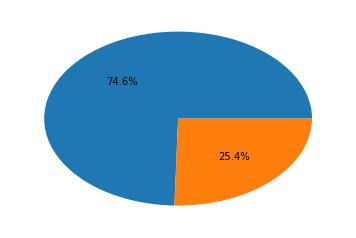

In [96]:
cnt = 0
for meta in topTen:
    cnt += meta[1]
    
plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

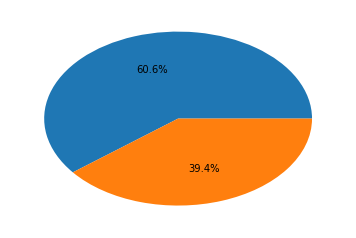

In [95]:
cnt = 0

for meta in topHund:
    cnt += meta[1]

plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

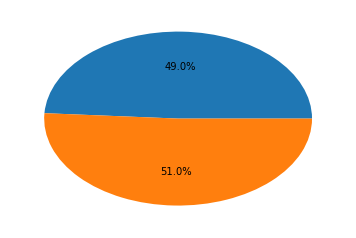

In [97]:
cnt = 0
for meta in topThousand:
    cnt += meta[1]
    
plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

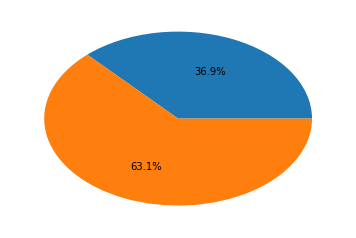

In [98]:
cnt = 0
for meta in topTenThousand:
    cnt += meta[1]
    
plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

In [37]:
hour = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18",
       "19","20","21","22","23"]
def getTopTen(data):
    data = data.select("query").collect()
    data = Counter(data).most_common(10)
    return data
    
    
for h in hour:
    print ("--"+h+"시--")
    click_data = spark.read.json(click_path+"/Hour="+h)
    click_data = click_data.filter(click_data.inflow_channel == "i")
    click_data = click_data.filter(click_data.tabcode == "tot")
    topTen = getTopTen(click_data)
    

--00시--
강아랑 :MLC
유튜브 :0DL
네이버 :0DL
폭스 테리어 :NNS
송혜교 행사참석 :NNS
이시언 일본여행논란 :NNS
강형욱 분노 :NNS
사나 퇴출요구 :MLC
구글 :0DL
날씨 :Z8T
-------
--01시--
유튜브 :0DL
폭스 테리어 :NNS
네이버 :0DL
강아랑 :1TH
송혜교 행사참석 :NNS
강형욱 :NNS
잠원동 건물붕괴 :NNS
이시언 일본여행논란 :NNS
구글 :0DL
정선아 :1TH
-------
--02시--
유튜브 :0DL
네이버 :0DL
이재욱 :1TH
폭스 테리어 :NNS
강형욱 :NNS
폭스테리어 :NNS
송혜교 행사참석 :NNS
잠원동 건물붕괴 :NNS
이시언 일본여행논란 :NNS
강아랑 :1TH
-------
--03시--
유튜브 :0DL
폭스테리어 :NNS
미국 지진 :MLC
네이버 :0DL
날씨 :Z8T
이재욱 :1TH
강형욱 :1TH
이시언 일본여행논란 :NNS
송혜교 행사참석 :NNS
잠원동 건물붕괴 :NNS
-------
--04시--
미국 지진 :MLC
날씨 :Z8T
유튜브 :0DL
폭스테리어 :NNS
네이버 :0DL
강아랑 :1TH
이시언 일본여행논란 :NNS
송혜교 행사참석 :NNS
잠원동 건물붕괴 :NNS
이시언 :1TH
-------
--05시--
미국 지진 :MLC
날씨 :Z8T
유튜브 :0DL
폭스테리어 :NNS
네이버 :0DL
강아랑 :1TH
이시언 일본여행논란 :NNS
잠원동 건물붕괴 :NNS
송혜교 행사참석 :NNS
강형욱 :NNS
-------
--06시--
미국 지진 :MLC
날씨 :Z8T
유튜브 :0DL
폭스테리어 :NNS
네이버 :0DL
김보미 :1TH
강형욱 :NNS
손정의 :1TH
이시언 일본여행논란 :NNS
송혜교 행사참석 :NNS
-------
--07시--
네이버 :0DL
날씨 :Z8T
유튜브 :0DL
폭스테리어 :NNS
미국 지진 :MLC
국립백두대간 수목원 :MLC
김보미 :NNS
손정의 :MLC
강형욱 :NNS
일본 불매운동 :NNS
-------
--

In [26]:
c = query_ranking.most_common(total)
li = []
n = []
k = 0
for meta in c:
    if k == 100: break
    k+=1
    li.append(meta[1])
for i in range(100):
    n.append(i+1)

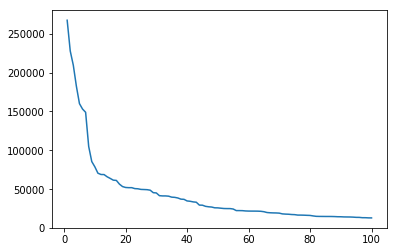

In [27]:
plt.plot(n, li)
plt.show()

In [36]:
# divide into section
n = 10
while n < 100000:
    print (n)
    for i in range(n, n+10):
        collection = click_data.filter(click_data.query == topHundThousand[i][0].query).select("collection").collect()
        mostFrequent = Counter(collection).most_common(1)
        print (topHundThousand[i][0].query+" :"+mostFrequent[0][0].collection.code)
        
    print ("-------")
    if n == 0:
        n += 1
    n *= 10

10


KeyboardInterrupt: 